In [ ]:
!pip install pandas numpy scikit-learn nltk

In [ ]:

#importer les bibliothéques
import requests # envoyer des requêtes HTTP dans py
import time # fornit des fonctionnalités pour manipuler le temps dans python
from bs4 import BeautifulSoup #bibliothèque Python pour extraire des données à partir de fichiers HTML et XML. Elle facilite le parsing, la navigation et la recherche dans les documents HTML.
import re #expressions régulières sont utilisées pour rechercher des motifs dans des chaînes de caractères
import pandas as pd #manipuler et l'analyser des données.
from nltk.corpus import stopwords  #importer la liste de mots vides  depuis nltk.corpus
import matplotlib.pyplot as plt  # Importation de matplotlib pour la visualisation des données
import seaborn as sns  # Importation de seaborn pour la visualisation des données
from collections import Counter  # Importation de Counter pour compter les occurrences des mots
from wordcloud import WordCloud  # Importation de WordCloud pour créer un nuage de mots
from sklearn.feature_extraction.text import CountVectorizer  # Importation de CountVectorizer pour la vectorisation du texte
import nltk  # Importation de NLTK pour le traitement du langage naturel
# Importer la fonction word_tokenize de NLTK pour la tokenisation des mots
from nltk.tokenize import word_tokenize

# Importer la classe TextBlob de textblob pour l'analyse de texte
from textblob import TextBlob

nltk.download('stopwords') #télécharger la liste de mots vides

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Définir les en-têtes pour la requête HTTP
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/125.0.0.0 Safari/537.36 Edg/125.0.0.0'}

# URL de la page contenant les commentaires
url = 'https://www.hespress.com/?action=ajax_listing&type=category&id=5&paged=7&tq=MjAyNC0wNS0yNCAwNzoyNTowMA%3D%3D3'

# Faire une requête HTTP pour obtenir le contenu de la page
response = requests.get(url, headers=headers)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Analyser le contenu HTML de la page
    soup = BeautifulSoup(response.content, 'html.parser')

    # Trouver les éléments sur la page contenant les commentaires
    pages = [i['href'] for i in soup.find_all('a', class_='stretched-link')]

    # Listes pour stocker les données
    auteurs = []
    dates = []
    comments = []

    # Boucle sur les pages contenant les commentaires
    for page in pages:
        response = requests.get(page, headers=headers)
        soup = BeautifulSoup(response.content, 'html.parser')
        auteur = soup.find_all('span', class_='fn heey')
        date = soup.find_all('div', class_='comment-date')
        comment = soup.find_all('div', class_='comment-text')
        for i in auteur:
            auteurs.append(i.get_text())
        for i in date:
            dates.append(i.get_text())
        for i in comment:
            comments.append(i.get_text())

# Créer un DataFrame avec les données
data = pd.DataFrame({'Auteurs': auteurs, 'Date': dates, 'Commentaires': comments})
data.to_csv('comments_hespress.csv', index=False)
#normalise le texte arabe en remplaçant certaines séquences répétitives et des caractères spécifiques.
def normalize_arabic(text):
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("وووووووووووووو", "و", text)
    text = re.sub("يييييييييي", "ي", text)
    text = re.sub("هههههههههههه", "ه", text)
    text = re.sub("اااا", "ا", text)
    text = re.sub("كككككككككككككك", "ك", text)
    text = re.sub("صصصصصصصصصصصصصصصصصص", "ص", text)
    text = re.sub("ببببببببببببببببببببب", "ب", text)

    return text
 # Supprime les signes diacritiques

def delete_diacritics(text):
    arabic_diacritics = re.compile("""
        ّ
        َ
        ً
        ُ
        ٌ
        ِ
        ٍ
        ْ
        ـ
    """, re.VERBOSE)
    return re.sub(arabic_diacritics, '', text)
# Supprimer la ponctuation
def remove_punctuation(text):
    text = re.sub(r'[^\w\s]', '', text)
    return text
# Supprimer les caractères spéciaux
def remove_special_characters(text):
    # Définir un ensemble de caractères spéciaux à supprimer
    special_characters = re.compile(r'[!@#$%^&*()_+={}\[\]:;"\'<>,.?/\\|`~]')
    return re.sub(special_characters, '', text)

# Supprimer les chiffres
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Supprimer les mots vides
def remove_stopwords(text, stopwords):
    words = text.split()
    filtered_words = [word for word in words if word not in stopwords]
    return ' '.join(filtered_words)

# Obtenir les mots vides en anglais depuis NLTK
english_stopwords = set(stopwords.words('english'))

# Combiner tous les mots vides
combined_stopwords = arabic_stopwords.union(darija_stopwords).union(english_stopwords)

# Appliquer la fonction remove_punctuation à chaque commentaire dans la colonne 'Commentaires'
data['Commentaires'] = data['Commentaires'].apply(remove_punctuation)


# Appliquer la fonction normalize_arabic à chaque commentaire dans la colonne 'Commentaires'
data['Commentaires'] = data['Commentaires'].apply(normalize_arabic)

# Appliquer la fonction delete_diacritics à chaque commentaire
data['Commentaires'] = data['Commentaires'].apply(delete_diacritics)


# Appliquer la fonction remove_special_characters à chaque commentaire
data['Commentaires'] = data['Commentaires'].apply(remove_special_characters)

# Appliquer la fonction remove_numbers à chaque commentaire
data['Commentaires'] = data['Commentaires'].apply(remove_numbers)

# Appliquer la fonction remove_stopwords à chaque commentaire en utilisant combined_stopwords
data['Commentaires'] = data['Commentaires'].apply(lambda x: remove_stopwords(x, combined_stopwords))

# Convertir chaque commentaire en minuscules
data['Commentaires'] = data['Commentaires'].apply(lambda x: x.lower())

# Le DataFrame 'data' contient maintenant les commentaires après chaque étape de prétraitement
data



,Auteurs,Date,Commentaires
0,said,\nالخميس 16 ماي 2024 - 06:09,المغرب خصو نسبه نمو فالميه سنويا الا بغى يخرج ...
1,Morning,\nالخميس 16 ماي 2024 - 11:30,انتعاش الطلب الخارجي الخضر الفواكه المياه الجو...
2,مغربي,\nالخميس 16 ماي 2024 - 13:14,دول صاعده إفريقيه وخاصه بغرب افريقيا بدات تحقق...
3,الواقع,\nالخميس 16 ماي 2024 - 13:20,وما سر الرتبه غلاء المعيشه حيث ان دول الجوار ا...
4,رشيد المكتفي .,\nالخميس 16 ماي 2024 - 17:04,أعتقد أنه الافضل تجميع التجاره والصناعات والخد...
...,...,...,...
121,Fellah,\nالثلاثاء 14 ماي 2024 - 22:19,مؤكد الصفقات العموميه بدأت تسيل لعاب شركات الب...
122,شكرا,\nالثلاثاء 14 ماي 2024 - 23:30,شكرا الخبر والاهتمام بالطريق السيار والرجاء ال...
123,اغيلاس,\nالثلاثاء 14 ماي 2024 - 23:32,تكريس العزله الجنوب الشرقي طرق مهترءه جد خطيره...
124,Mouhajir,\nالأربعاء 15 ماي 2024 - 05:39,والمقطع بين تيط مليل وبرشيد الذي انطلق مؤخرا ط...


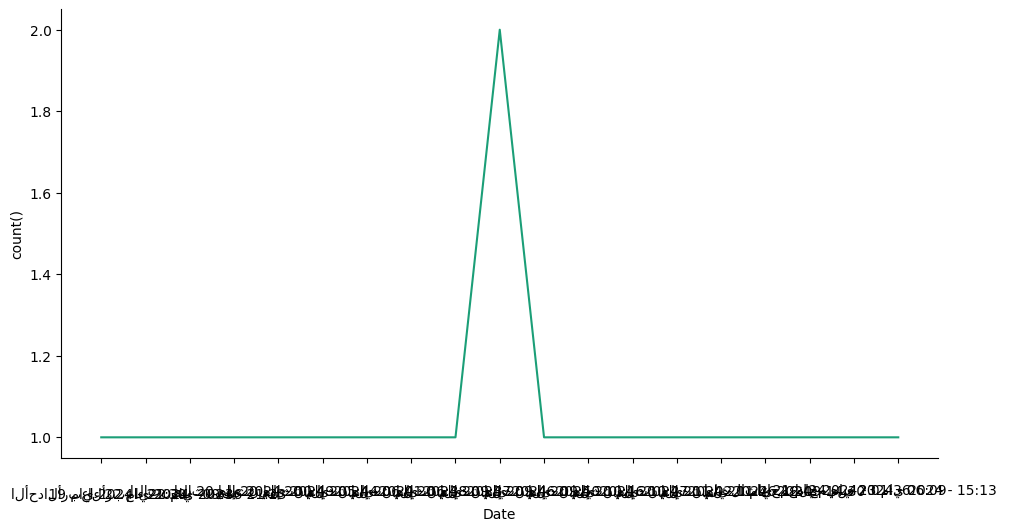

In [ ]:
# Fonction pour tracer une série
def _plot_series(series, series_name, series_index=0):
    # Définir une palette de couleurs pour le tracé
    palette = list(sns.palettes.mpl_palette('Dark2'))

    # Compter les occurrences de chaque date dans la série
    counted = (series['Date']
               .value_counts()
               .reset_index(name='counts')
               .rename({'index': 'Date'}, axis=1)
               .sort_values('Date', ascending=True))

    # Extraire les valeurs x et y pour le tracé
    xs = counted['Date']
    ys = counted['counts']

    # Tracer la série
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

# Créer une figure et un axe pour le tracé
fig, ax = plt.subplots(figsize=(10, 5.2), constrained_layout=True)

# Trier le DataFrame par date
df_sorted = _df_0.sort_values('Date', ascending=True)

# Tracer la série
_plot_series(df_sorted, '')

# Supprimer les bords supérieur et droit du tracé
sns.despine(fig=fig, ax=ax)

# Définir les étiquettes pour les axes x et y
plt.xlabel('Date')
plt.ylabel('count()')
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


          Auteurs                           Date  \
0            said  \nالخميس 16 ماي 2024 - 06:09    
1         Morning  \nالخميس 16 ماي 2024 - 11:30    
2           مغربي  \nالخميس 16 ماي 2024 - 13:14    
3          الواقع  \nالخميس 16 ماي 2024 - 13:20    
4  رشيد المكتفي .  \nالخميس 16 ماي 2024 - 17:04    

                                        Commentaires  
0  \nالمغرب خصو نسبة نمو 30 فالمية سنويا الا بغى ...  
1  \nانتعاش الطلب الخارجي على الخضر و الفواكه و ا...  
2  \nهناك دول صاعدة إفريقية وخاصة بغرب افريقيا بد...  
3  \nوما سر الرتبة 98 في غلاء المعيشة حيث ان دول ...  
4  \nأعتقد أنه من الافضل تجميع التجارة والصناعات ...  
Nombre de commentaires: 126
La longueur moyenne d'un commentaire: 227.68253968253967
Statistiques sur les commentaires:
 count     126.000000
mean      227.682540
std       180.053665
min        21.000000
25%       110.500000
50%       178.000000
75%       280.750000
max      1001.000000
Name: Commentaires, dtype: float64


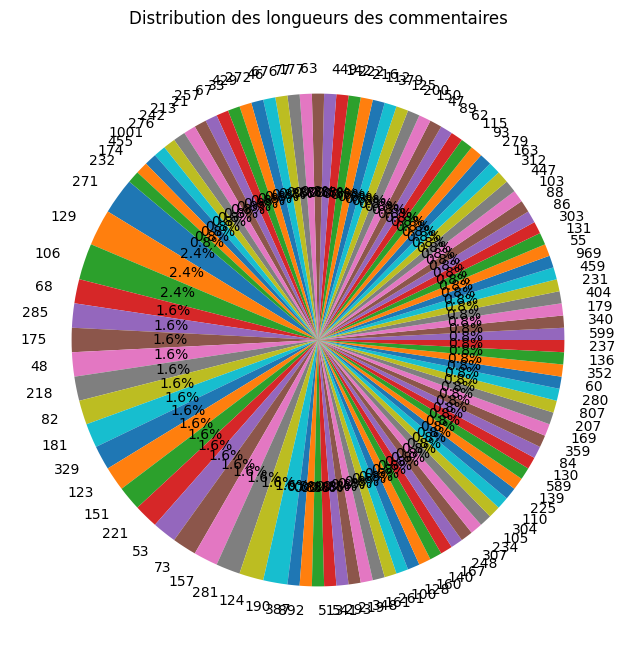

                                        Commentaires  sentiment  \
0  [المغرب, خصو, نسبة, نمو, 30, فالمية, سنويا, ال...        0.0   
1  [انتعاش, الطلب, الخارجي, على, الخضر, و, الفواك...        0.0   
2  [هناك, دول, صاعدة, إفريقية, وخاصة, بغرب, افريق...        0.0   
3  [وما, سر, الرتبة, 98, في, غلاء, المعيشة, حيث, ...        0.0   
4  [أعتقد, أنه, من, الافضل, تجميع, التجارة, والصن...        0.0   

  sentiment_category  
0            Neutral  
1            Neutral  
2            Neutral  
3            Neutral  
4            Neutral  


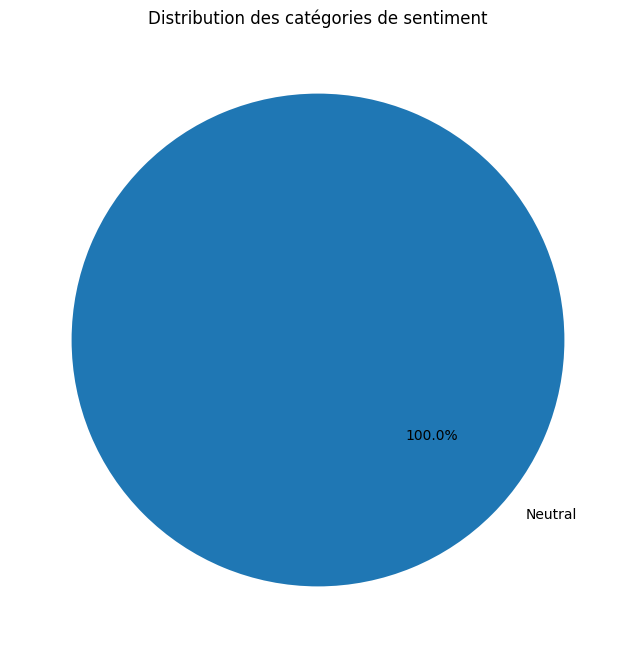

In [ ]:

# Télécharger les ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Charger les données depuis un fichier CSV (ou autre source)
data = pd.read_csv('comments_hespress.csv')  # Remplacez 'comments_hespress.csv' par le chemin réel de votre fichier

# Affichage des cinq premières lignes des données
print(data.head())

# Statistiques de base sur les commentaires
print("Nombre de commentaires:", len(data))  # Affichage du nombre total de commentaires
print("La longueur moyenne d'un commentaire:", data['Commentaires'].apply(len).mean())  # Affichage de la longueur moyenne d'un commentaire
print("Statistiques sur les commentaires:\n", data['Commentaires'].apply(len).describe())  # Affichage des statistiques sur la longueur des commentaires

# Création d'un diagramme circulaire pour la distribution des longueurs des commentaires
plt.figure(figsize=(8, 8))
length_counts = data['Commentaires'].apply(len).value_counts()
plt.pie(length_counts, labels=length_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des longueurs des commentaires')
plt.show()

# Définir les mots vides combinés
stop_words = set(stopwords.words('french'))  # Remplacez 'french' par la langue appropriée
additional_stopwords = set()  # Ajoutez ici d'autres mots vides personnalisés si nécessaire
combined_stopwords = stop_words.union(additional_stopwords)

# Définir une fonction pour tokenizer le texte
def tokenize_text(text):
    if isinstance(text, str):  # Vérifier si le texte est une chaîne de caractères
        return word_tokenize(text)
    else:
        return []  # Retourner une liste vide si le texte n'est pas une chaîne de caractères

# Appliquer la tokenization aux Commentaires
data['Commentaires'] = data['Commentaires'].apply(tokenize_text)

# Définition d'une fonction pour obtenir le score de sentiment
def get_sentiment(tokens):
    # Joindre les tokens pour former une chaîne de caractères
    text = ' '.join(tokens)
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Ajout des scores de sentiment au DataFrame
data['sentiment'] = data['Commentaires'].apply(get_sentiment)

# Ajouter une colonne pour la catégorie de sentiment
def categorize_sentiment(score):
    if score > 0.1:
        return 'Positive'
    elif score < -0.6:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment'].apply(categorize_sentiment)

# Vérifier les scores de sentiment et les catégories calculés
print(data[['Commentaires', 'sentiment', 'sentiment_category']].head())

# Créer un diagramme circulaire pour la distribution des catégories de sentiment
plt.figure(figsize=(8, 8))
sentiment_counts = data['sentiment_category'].value_counts()
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution des catégories de sentiment')
plt.show()


In [ ]:
import nltk  # Importer la bibliothèque nltk

# Télécharger les données nécessaires pour la tokenization
nltk.download('punkt')

# Définir une fonction pour tokenizer le texte
def tokenize_text(text):
    if isinstance(text, str):  # Vérifier si le texte est une chaîne de caractères
        return word_tokenize(text)  # Utiliser la fonction word_tokenize de nltk pour tokenizer le texte
    else:
        return []  # Retourner une liste vide si le texte n'est pas une chaîne de caractères

# Appliquer la tokenization aux Commentaires
data['Commentaires'] = data['Commentaires'].apply(tokenize_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
